## Importing modules

In [1]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-

#__modification time__ = 2026-01-20
#__author__ = Qi Zhou, Helmholtz Centre Potsdam - GFZ German Research Centre for Geosciences
#__find me__ = qi.zhou@gfz.de, qi.zhou.geo@gmail.com, https://github.com/Qi-Zhou-Geo
# Please do not distribute this code without the author's permission

from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client

# <editor-fold desc="add the sys.path to search for custom modules">
from pathlib import Path

# current_dir = Path(__file__).resolve().parent # Jupyter does not support this
current_dir = "/Users/qizhou/#python/Flow-Alert/demo"

# using ".parent" on "pathlib.Path" object moves one level up the directory hierarchy
# project_root = current_dir.parent.parent # Jupyter does not support this
project_root = "/Users/qizhou/#python/Flow-Alert"

import sys

sys.path.append(str(project_root))
# </editor-fold>


# import the custom functions
from functions.model.interface_model import FlowAlert

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/usr/local/Caskroom/mambaforge/base/envs/flow-alert/lib/python3.11/site-packages/obspy/core/util/base.py:26: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


## Fetch some seismic signals

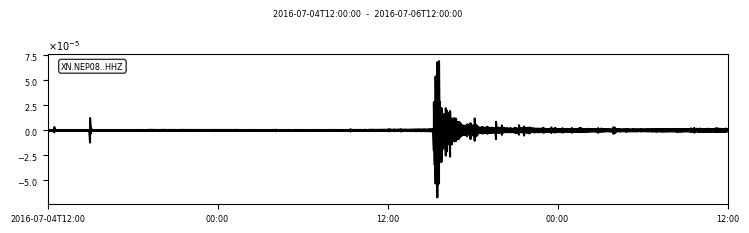

               network: XN
               station: NEP08
              location: 
               channel: HHZ
             starttime: 2016-07-04T12:00:00.000000Z
               endtime: 2016-07-06T12:00:00.000000Z
         sampling_rate: 200.0
                 delta: 0.005
                  npts: 34560001
                 calib: 1.0
_fdsnws_dataselect_url: http://geofon.gfz-potsdam.de/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'D', 'number_of_records': 17843, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 73084928})
            processing: ['ObsPy 1.4.0: trim(endtime=UTCDateTime(2016, 7, 6, 14, 0)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2016, 7, 4, 10, 0))', "ObsPy 1.4.0: detrend(options={}::type='linear')", "ObsPy 1.4.0: detrend(options={}::type='demean')", "ObsPy 1.4.0: taper(max_length=None::max_percentage=0.05::side='both'::type='hann')", "ObsPy 1.4.0: remove_

In [2]:
client = Client("GEOFON")

network, station, location, channel = "XN", "NEP08", "", "HHZ"
starttime = UTCDateTime("2016-07-04T10:00:00")
endtime = UTCDateTime("2016-07-06T14:00:00")

inventory = client.get_stations(network=network, station=station, location=location, channel=channel,
                                starttime=starttime, endtime=endtime, level="response")

st = client.get_waveforms(network=network, station=station, location=location, channel=channel,
                          starttime=starttime, endtime=endtime)

st.merge(method=1, fill_value='latest', interpolation_samples=0)
st._cleanup()
st.detrend("linear")
st.detrend("demean")
st.taper(max_percentage=0.05)
st.remove_response(inventory=inventory, output="VEL", pre_filt=(0.5, 1, 30, 45), water_level=60)
st.filter("bandpass", freqmin=1.0, freqmax=25.0)
st.detrend("linear")
st.detrend("demean")
st.taper(max_percentage=0.05)
st.trim(starttime + 2 * 3600, endtime - 2 * 3600)

st.plot()
print(st[0].stats)

## Have Fun with FlowAlert

Load Pre-trained model from:
 </Users/qizhou/#python/Flow-Alert/trained_model/v1dot3model/Model=LSTM_STA=ILL02_Feature=H_repeat=1.pt>. 
Model summary:
Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %                   Trainable
LSTM_Attention                           [1, 64, 12]               [1, 2]                    256                         0.01%                   True
├─LSTM: 1-1                              [1, 64, 12]               [1, 64, 256]              1,855,488                  84.87%                   True
├─LayerNorm: 1-2                         [1, 64, 256]              [1, 64, 256]              512                         0.02%                   True
├─MultiheadAttention: 1-3                [1, 64, 256]              [1, 64, 256]              263,168                    12.04%                   True
├─Sequential: 1-4                        [1, 256]                  [1, 2]                    -

/usr/local/Caskroom/mambaforge/base/envs/flow-alert/lib/python3.11/site-packages/obspy/core/util/base.py:26: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/usr/local/Caskroom/mambaforge/base/envs/flow-alert/lib/python3.11/site-packages/obspy/core/util/base.py:26: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/usr/local/Caskroom/mambaforge/base/envs/flow-alert/lib/python3.11/site-packages/obspy/core/util/base.py:26: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is s

Progress of <prepare_feature>: 100%|██████████| 2880/2880 [04:56<00:00,  9.70it/s]
Load Pre-trained model from:
 </Users/qizhou/#python/Flow-Alert/trained_model/v1dot3model/Model=LSTM_STA=ILL02_Feature=H_repeat=1.pt>. 
Model summary:
Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %                   Trainable
LSTM_Attention                           [1, 64, 12]               [1, 2]                    256                         0.01%                   True
├─LSTM: 1-1                              [1, 64, 12]               [1, 64, 256]              1,855,488                  84.87%                   True
├─LayerNorm: 1-2                         [1, 64, 256]              [1, 64, 256]              512                         0.02%                   True
├─MultiheadAttention: 1-3                [1, 64, 256]              [1, 64, 256]              263,168                    12.04%                   True
├─Sequentia

/Users/qizhou/#python/Flow-Alert/functions/model/interface_model.py:217: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/qizhou/#python/Flow-Alert/functions/model/interface_model.py:219: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"{output_path}/{output_format}.png", dpi=600)  # , transparent=True
/usr/local/Caskroom/mambaforge/base/envs/flow-alert/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


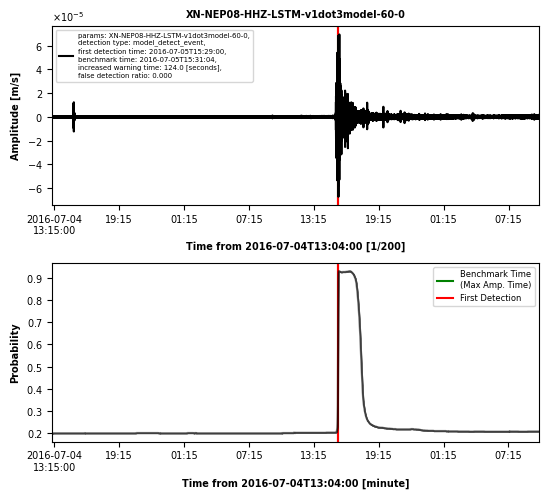

2026-01-21T15:23:47.619133
params: XN-NEP08-HHZ-LSTM-v1dot3model-60-0,
detection type: model_detect_event,
first detection time: 2016-07-05T15:29:00,
benchmark time: 2016-07-05T15:31:04,
increased warning time: 124.0 [seconds],
false detection ratio: 0.000
Done: LSTM


/Users/qizhou/#python/Flow-Alert/functions/model/interface_model.py:217: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/qizhou/#python/Flow-Alert/functions/model/interface_model.py:219: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"{output_path}/{output_format}.png", dpi=600)  # , transparent=True
/usr/local/Caskroom/mambaforge/base/envs/flow-alert/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


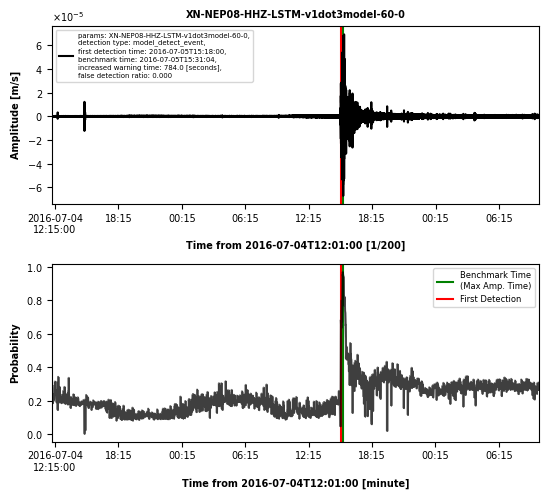

2026-01-21T15:24:22.589911
params: XN-NEP08-HHZ-LSTM-v1dot3model-60-0,
detection type: model_detect_event,
first detection time: 2016-07-05T15:18:00,
benchmark time: 2016-07-05T15:31:04,
increased warning time: 784.0 [seconds],
false detection ratio: 0.000
Done: RF


/Users/qizhou/#python/Flow-Alert/functions/model/interface_model.py:217: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/qizhou/#python/Flow-Alert/functions/model/interface_model.py:219: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"{output_path}/{output_format}.png", dpi=600)  # , transparent=True
/usr/local/Caskroom/mambaforge/base/envs/flow-alert/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


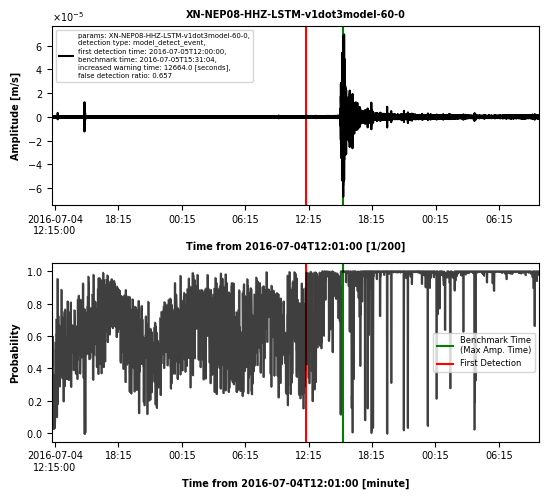

2026-01-21T15:24:58.581498
params: XN-NEP08-HHZ-LSTM-v1dot3model-60-0,
detection type: model_detect_event,
first detection time: 2016-07-05T12:00:00,
benchmark time: 2016-07-05T15:31:04,
increased warning time: 12664.0 [seconds],
false detection ratio: 0.657
Done: XGB


In [3]:
event_star, event_end = "2016-07-05T15:00:00", "2016-07-05T19:00:00"  # this is a rough estimate
benchmark_time = "2016-07-05T15:31:04"  # this timestamp for the second surge of the GLOF was reported by Cook et al. (2018)
model_version = "v1dot3model"

model_type = "LSTM"
flow_alert = FlowAlert(model_type, model_version, st, output_path=current_dir)
flow_alert.model_config()
flow_alert.load_model()
flow_alert.prepare_feature()

# test the three models by same st data
for model_type in ["LSTM", "RF", "XGB"]:
    # overwrite the default model type
    flow_alert.model_type = model_type
    flow_alert.model_config()
    flow_alert.load_model()

    flow_alert.make_prediction(tested_model=model_type)
    flow_alert.plot(event_star, event_end, benchmark_time)
    print(f"Done: {model_type}")